In [1]:
import numpy as np
import pandas as pd 

import bz2 
import os 

In [2]:
!dir 

 Volume in drive C is Local Disk
 Volume Serial Number is 4459-1FFE

 Directory of C:\Users\nazia\Project 1a

04/07/2022  11:28 AM    <DIR>          .
04/07/2022  11:28 AM    <DIR>          ..
03/16/2022  06:14 PM    <DIR>          .ipynb_checkpoints
02/26/2022  04:27 PM    <DIR>          Data
04/07/2022  11:28 AM           186,633 Project 1A.ipynb
               1 File(s)        186,633 bytes
               4 Dir(s)   4,917,174,272 bytes free


In [3]:
!dir data

 Volume in drive C is Local Disk
 Volume Serial Number is 4459-1FFE

 Directory of C:\Users\nazia\Project 1a\data

02/26/2022  04:27 PM    <DIR>          .
02/26/2022  04:27 PM    <DIR>          ..
02/26/2022  04:27 PM           113,522 bus.csv.bz2
02/26/2022  04:27 PM           110,843 ins.csv.bz2
02/26/2022  04:27 PM           146,937 ins2vio.csv.bz2
02/26/2022  04:27 PM               474 sf_zipcodes.json
02/26/2022  04:27 PM             1,337 vio.csv.bz2
               5 File(s)        373,113 bytes
               2 Dir(s)   4,917,174,272 bytes free


In [4]:
from pathlib import Path

Path.cwd()

WindowsPath('C:/Users/nazia/Project 1a')

In [5]:
with bz2.open("data/bus.csv.bz2", "r") as f:
    print("The first line:", "\n\t", f.readline())

The first line: 
	 b'"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n'


In [6]:
def list_files(directory):
    """
    Return a list of pathlib.Path objects for the files in the directory.
    
    directory: a string describing the directory to list 
        for example 'data/'
    """
    path = Path(directory)
    files_list = []
    for x in path.iterdir():
        files_list.append(x)
    return files_list

def get_file_size(file_name):
    """
    Return file size for a given filename.
    """ 
    file_path_object = Path(file_name)
    return file_path_object.stat().st_size

def get_linecount_bz2(file_name):
    """
    Returns the number of lines in bz2 file.  
    """ 
    count = 0
    with bz2.open(file_name, "r") as f:
        for line in f:
            count = count + 1
    return count


In [7]:
#Checking the file size and the number of lines for each data file. 

info = []
for f in list_files("data/"):
    name = str(f)
    if name[-3:] == "bz2": 
        size = get_file_size(f)
        linecount = get_linecount_bz2(f)
        info.append({"name": name, "size": size, "linecount": linecount})

file_info = pd.DataFrame(info).sort_values("size")
file_info

,name,size,linecount
3,data\vio.csv.bz2,1337,66
1,data\ins.csv.bz2,110843,26664
0,data\bus.csv.bz2,113522,6254
2,data\ins2vio.csv.bz2,146937,40211


In [8]:


def head_bz2(file, nlines=5):
    """
    Return a list of the first nlines lines of filename
    """
    line_list = []
    with bz2.open(file, "r") as f:
        for line in np.arange(nlines):
            this_line = f.readline()
            line_list.append(this_line)
        return line_list

def print_head_bz2(file, nlines=5):
    """
    Print a list of the first nlines lines of filename
    """
    print(file)
    line_num = 0
    for x in head_bz2(file, nlines):
        line_num += 1
        print(str(line_num) + ":" + "  " + str(x))
        #print(x)

In [9]:
for file in list_files("data/"):
    if str(file)[-3:] == "bz2":  
        print_head_bz2(file)
        print()

data\bus.csv.bz2
1:  b'"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n'
2:  b'"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n'
3:  b'"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n'
4:  b'"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n'
5:  b'"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n'

data\ins.csv.bz2
1:  b'"iid","date","score","type"\n'
2:  b'"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n'
3:  b'"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n'
4:  b'"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n'
5:  b'"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n'

data\ins2vio.csv.bz2
1:  

In [143]:
#The bus.csv.bz2 file does not appears to be tab delimited.

In [142]:
#The values all appear to be quoted.

In [12]:
#Uploading data
bus = pd.read_csv('data/bus.csv.bz2')
ins = pd.read_csv('data/ins.csv.bz2')
ins2vio = pd.read_csv('data/ins2vio.csv.bz2')
vio = pd.read_csv('data/vio.csv.bz2')

In [13]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [14]:
print("Number of rows: ", bus.shape[0])
print("Number of columns: ", bus.shape[1])

Number of rows:  6253
Number of columns:  9


In [15]:
ins.head()

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [16]:
print("Number of rows: ", ins.shape[0])
print("Number of columns: ", ins.shape[1])

Number of rows:  26663
Number of columns:  4


In [17]:
ins2vio.head()

,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138


In [18]:
print("Number of rows: ", ins2vio.shape[0])
print("Number of columns: ", ins2vio.shape[1])

Number of rows:  40210
Number of columns:  2


In [19]:
vio.head()

,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123


In [20]:
print("Number of rows: ", vio.shape[0])
print("Number of columns: ", vio.shape[1])

Number of rows:  65
Number of columns:  3


In [21]:
#Looking for issues in the data
#Checking for null values
bus.isnull().sum()

business id column    0
name                  0
address               0
city                  0
state                 0
postal_code           0
latitude              0
longitude             0
phone_number          0
dtype: int64

In [22]:
ins.isnull().sum()

iid      0
date     0
score    0
type     0
dtype: int64

In [23]:
ins2vio.isnull().sum()

iid    0
vid    0
dtype: int64

In [24]:
vio.isnull().sum()

description      0
risk_category    0
vid              0
dtype: int64

In [144]:
#No null values found in the either data.
#Issues found in zip codes column.

In [145]:
#Beginning analysis of business data
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124


In [27]:
#Renaming column Business Id Column
bus = bus.rename(index=str, columns={'business id column': 'bid'})


In [28]:
#Checking to find any duplicates for bid 
is_bid_unique = is_bid_unique = len(pd.value_counts(bus['bid'])) == len(pd.unique(bus['bid']))


In [29]:
#Checking to find the total number of records for each business
name_counts = pd.value_counts(bus['name'])
name_counts.head(20)

Peet's Coffee & Tea                                       20
Starbucks Coffee                                          13
McDonald's                                                10
Jamba Juice                                               10
STARBUCKS                                                  9
Proper Food                                                9
Mixt Greens/Mixt                                           8
Specialty's Cafe & Bakery                                  8
Philz Coffee                                               7
The Organic Coup                                           7
Starbucks                                                  7
Whole Foods Market                                         7
Blue Bottle Coffee                                         7
Bon Appetit @ Twitter                                      6
Lee's Deli                                                 6
BlueStar Refreshment Services @ Uber Technologies, Inc     6
Annie's Hot Dogs & Pretz

In [30]:
#Checking to find the total number of records for each address

address_counts = pd.value_counts(bus['address'])
address_counts.head(10)


Off The Grid              39
428 11th St               34
2948 Folsom St            17
3251 20th Ave             17
Pier 41                   16
103 Horne Ave             14
24 Willie Mays Plaza      13
Off the Grid              11
1 United Nations Plaza    10
2948 Folsom St.           10
Name: address, dtype: int64

In [146]:
#Each record represents a chain of restaurants

In [147]:
#The minimal primary is bid

In [148]:
#The data type appears to be Nominal and is a series data type

In [35]:
bus.dtypes

bid               int64
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
phone_number      int64
dtype: object

In [36]:
#Importing a list of valid San Francisco ZIP codes to load the file data/sf_zipcodes.json 


valid_zips = pd.read_json("data/sf_zipcodes.json", dtype={'zip_codes':str})['zip_codes']
valid_zips.head()

0    94102
1    94103
2    94104
3    94105
4    94107
Name: zip_codes, dtype: object

In [37]:
#Creating a dataframe with only invalid ZIP codes

invalid_zip_bus = bus[bus['postal_code'].isin(valid_zips)==False]
invalid_zip_bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.0,-9999.0,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.0,-9999.0,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.0,-9999.0,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.0,-9999.0,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.0,-9999.0,-9999


In [38]:
#Counting the number of businesses at each address that have this single likely MISSING postal code value. 

missing_zip_address_count = pd.value_counts(bus[bus["postal_code"] == '-9999']['address'])
missing_zip_address_count.head()

Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
Name: address, dtype: int64

In [149]:
#If we were to drop businesses with MISSING postal code values a particular class of business be affected.

In [40]:
#Creating a new column 'postal5' containing the first 5 digits of the 'postal_code' column, as the whole 9 digit code 
#does not mean an invalid entry.  
#Checking the 'postal5' column for valid San Francisco ZIP code


bus['postal5'] = bus['postal_code'].apply(lambda x: x[:5])
bus.loc[bus['postal5'].isin(valid_zips)==False, 'postal5'] = None
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]


,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


In [41]:
#Beginning analysis of inspection data
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


In [150]:
is_ins_iid_a_primary_key = len(pd.value_counts(ins['iid'])) == len(pd.unique(ins['iid']))
#All values in ins dataframe have a unique id.


In [44]:
#Checking for valid business ids

invalid_bid_count = len(ins.loc[ins['bid'].isin(bus['bid'])])


In [151]:
#The column ins['bid'] is a foreign key referencing to bus['bid'] primary key.

In [46]:
ins_date_type = type(ins['date'][0])
ins_date_type

str

In [47]:
ins['timestamp'] = pd.to_datetime(ins['date'])

In [48]:

earliest_date = min(ins['timestamp'])
latest_date = max(ins['timestamp'])

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


In [49]:
#Creating a new column ins['year'] containing just the year of the inspection.

ins['year'] = ins['timestamp'].dt.year

In [50]:
ins.head()

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019


In [51]:
#Adding the number of inspections across all four years


ins_pivot = pd.pivot_table(ins, columns='year', index='type', aggfunc='size', fill_value=0)
ins_pivot['Total'] = ins_pivot.sum(axis=1)
ins_pivot_sorted = ins_pivot.sort_values('Total', ascending=False)

ins_pivot_sorted

year,2016,2017,2018,2019,Total
type,,,,,
Routine - Unscheduled,966,4057,4373,4681,14077
Reinspection/Followup,445,1767,1935,2292,6439
New Ownership,99,506,528,459,1592
Complaint,91,418,512,437,1458
New Construction,102,485,218,189,994
Non-inspection site visit,51,276,253,231,811
New Ownership - Followup,0,45,219,235,499
Structural Inspection,1,153,50,190,394
Complaint Reinspection/Followup,19,68,70,70,227


In [52]:
#The year that appears to have had a lot of businesses in new buildings is 2017.

print('year_of_new_construction = 2017')

year_of_new_construction = 2017


In [53]:
#Examining inspection scores ins['score']

ins['score'].value_counts().head()

-1      12632
 100     1993
 96      1681
 92      1260
 94      1250
Name: score, dtype: int64

In [54]:
#Creating dataframe to check what type of inspections have scores and which do not. 


ins['boolean_column']= ins['score']==-1
ins_missing_score_pivot=pd.pivot_table(ins,index='type', columns='boolean_column',values='score', aggfunc='count',
                       dropna=True, observed=True,fill_value=0)
ins_missing_score_pivot['Total']=ins_missing_score_pivot.sum(axis=1)
ins_missing_score_pivot=ins_missing_score_pivot.sort_values('type',axis=0,ascending=False)
ins_missing_score_pivot


boolean_column,False,True,Total
type,,,
Structural Inspection,0,394,394
Special Event,0,3,3
Routine - Unscheduled,14031,46,14077
Routine - Scheduled,0,46,46
Reinspection/Followup,0,6439,6439
Non-inspection site visit,0,811,811
New Ownership - Followup,0,499,499
New Ownership,0,1592,1592
New Construction,0,994,994


In [55]:
#Inspection scores only appear to be assigned to Routine - Unscheduled inspections. 

In [56]:
#Creating a new dataframe containing the name and address of every business as determined by the bus dataframe

bus['bid']=bus['bid'].astype('int64')
ins_named=ins.merge(bus[['name','address','bid']],how='left',on='bid' )
ins_named.head()



,iid,date,score,type,bid,timestamp,year,boolean_column,name,address
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St


In [57]:
#Looking for the twenty lowest median score for businesses

twenty_lowest_scoring = ins_named[ins_named['score']>=0]
twenty_lowest_scoring_1=twenty_lowest_scoring.groupby(by='bid',as_index=False)
twenty_lowest_scoring_2=twenty_lowest_scoring_1.agg({'name':'first','score':'median'})
twenty_lowest_scoring_2_sorted=twenty_lowest_scoring_2.sort_values('score')
twenty_lowest_scoring_2_sorted.head(20)

,bid,name,score
3876,84590,Chaat Corner,54.0
4564,90622,Taqueria Lolita,57.0
4990,94351,VBowls LLC,58.0
2719,69282,New Jumbo Seafood Restaurant,60.5
222,1154,SUNFLOWER RESTAURANT,63.5
1991,39776,Duc Loi Supermarket,64.0
2734,69397,Minna SF Group LLC,64.0
4870,93150,Chez Beesen,64.0
4911,93502,Smoky Man,64.0
3291,78328,Golden Wok,64.0


In [58]:
#Examining the descriptions of violations for inspections with score >0 and score <65 


low_score_violations = ins.merge(ins2vio,how='left',on='iid')
low_score_violations_1=low_score_violations.merge(vio,how='left', on='vid')
low_score_violations_2=low_score_violations_1[low_score_violations_1['score']<65]
low_score_violations_3=low_score_violations_2[low_score_violations_2['score']>0]
low_score_violations_grouped=low_score_violations_3.groupby('description').size().sort_values(ascending=False)
low_score_violations_grouped

description
Unclean or unsanitary food contact surfaces                                  43
High risk food holding temperature                                           42
Unclean or degraded floors walls or ceilings                                 40
Unapproved or unmaintained equipment or utensils                             39
Foods not protected from contamination                                       37
High risk vermin infestation                                                 37
Inadequate food safety knowledge or lack of certified food safety manager    35
Inadequate and inaccessible handwashing facilities                           35
Improper thawing methods                                                     30
Unclean hands or improper use of gloves                                      27
Improper cooling methods                                                     25
Unclean nonfood contact surfaces                                             21
Improper food storage       

In [139]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Distribution of Inspection Scores')

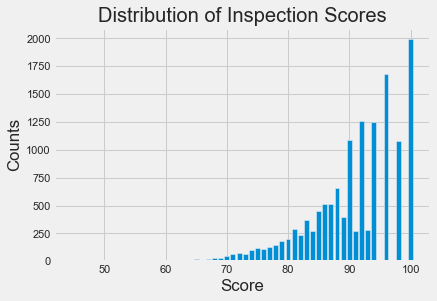

In [61]:
#Creating a barplot to check the distribution of inspection score

scores_above_0=ins[ins['score']>=0]
value_counts=scores_above_0.value_counts('score')

plt.bar(value_counts.index, value_counts)
plt.xlabel('Score')
plt.ylabel('Counts')
plt.title('Distribution of Inspection Scores')

In [141]:
#Qualities of the distribution of the inspection scores

print('Mode = 100')
print('Symmetry = Skewed Left')
print('Kurtosis = Medium Kurtosis')



Mode = 100
Symmetry = Skewed Left
Kurtosis = Medium Kurtosis


In [107]:
#Looking for the restaurant with the worst score

bus['bid']=bus['bid'].astype('int64')
ins_named=ins.merge(bus[['name','address','bid']],how='left',on='bid' )
ins_named=ins_named.rename(columns={'boolean_column':'Missing Score'})
ins_named.head()

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St


In [108]:
worst_restaurant = ins_named[ins_named['score']>=0]
worst_restaurant.sort_values('score').head(1)

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
19077,86718_20180522,05/22/2018 12:00:00 AM,45,Routine - Unscheduled,86718,2018-05-22,2018,False,Lollipot,890 Taraval St


In [111]:
#Looking for the restaurant with the most extreme improvement in its ratings
#Term "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating.
#Restaurants with at least 3 ratings or scores is considered here


bus['bid']=bus['bid'].astype('int64')
Merge_table=ins.merge(bus[['name','address','bid']],how='left',on='bid' )
Merge_table_new=Merge_table[Merge_table['score']>=0]
Merge_table_new=Merge_table_new.rename(columns={'boolean_column':'Missing Score'})
Merge_table_new.head()

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False,UNCLE LEE CAFE,3608 BALBOA ST
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr


In [112]:
Merge_grouped=Merge_table_new.groupby('bid')
Greater_than_3_scores= Merge_grouped.filter(lambda x:len(x) >=3 )
GG=Greater_than_3_scores.groupby('bid')
A=GG['score'].min()

B=GG['score'].max()
max_swing=B-A
max_swing

bid
24        0
45        7
58       13
61        4
66        2
         ..
95628    19
95752     2
95761     7
96591     8
97064     0
Name: score, Length: 2658, dtype: int64

In [113]:
df=pd.DataFrame(max_swing)
New_df=Greater_than_3_scores.merge(df, how='left',on= 'bid' )
New_df.head()

,iid,date,score_x,type,bid,timestamp,year,Missing Score,name,address,score_y
0,1000_20171002,10/02/2017 12:00:00 AM,74,Routine - Unscheduled,1000,2017-10-02,2017,False,HEUNG YUEN RESTAURANT,3279 22nd St,4
1,1000_20180523,05/23/2018 12:00:00 AM,76,Routine - Unscheduled,1000,2018-05-23,2018,False,HEUNG YUEN RESTAURANT,3279 22nd St,4
2,1000_20190617,06/17/2019 12:00:00 AM,72,Routine - Unscheduled,1000,2019-06-17,2019,False,HEUNG YUEN RESTAURANT,3279 22nd St,4
3,1002_20170928,09/28/2017 12:00:00 AM,85,Routine - Unscheduled,1002,2017-09-28,2017,False,BIG MOUTH BURGERS,3392 24th St,7
4,1002_20180509,05/09/2018 12:00:00 AM,90,Routine - Unscheduled,1002,2018-05-09,2018,False,BIG MOUTH BURGERS,3392 24th St,7


In [114]:
max_swing=New_df.sort_values(by='score_y', ascending=False).head(1)['name'].values[0]

In [115]:
max_swing

'Lollipot'

In [116]:
#Looking for how many times a restaurant has been inspected in a given year

ins_num=ins.groupby(['bid','year']).count()

ins_num=ins_num[['iid']]
inspections_by_id_and_year=ins_num.rename(columns={'iid':'count'})
inspections_by_id_and_year

count
bid    year       
19     2017      1
       2018      1
24     2016      1
       2017      1
       2019      2
...            ...
102518 2019      1
102577 2019      1
102602 2019      1
102702 2019      1
102705 2019      1

[14464 rows x 1 columns]

In [117]:
inspections_by_id_and_year['count'].value_counts()

1     7211
2     4334
3     1729
4      703
5      294
6      116
7       39
8       22
9        7
10       4
17       1
13       1
14       1
12       1
11       1
Name: count, dtype: int64

In [ ]:
#Many businesses are inspected multiple times in a year. 

In [122]:
#Checking to see if the ratings typically go up between the first and the second inspection. 
#Only considering the year 2018 here. 

ins2018 = ins[ins['year'] == 2018]
ins2018=ins2018.rename(columns={'boolean_column':'Missing Score'})
ins2018.head()

,iid,date,score,type,bid,timestamp,year,Missing Score
62,1000_20180523,05/23/2018 12:00:00 AM,76,Routine - Unscheduled,1000,2018-05-23,2018,False
63,1000_20180608,06/08/2018 12:00:00 AM,-1,Reinspection/Followup,1000,2018-06-08,2018,True
145,1002_20180509,05/09/2018 12:00:00 AM,90,Routine - Unscheduled,1002,2018-05-09,2018,False
148,10030_20180226,02/26/2018 12:00:00 AM,100,Routine - Unscheduled,10030,2018-02-26,2018,False
149,10030_20181016,10/16/2018 12:00:00 AM,100,Routine - Unscheduled,10030,2018-10-16,2018,False


In [123]:
ins2018=ins2018[ins2018['score']>0]
ins2018_count2=ins2018.groupby('bid').filter(lambda x:len(x) == 2)
ins2018_count2=ins2018_count2.groupby('bid').agg(lambda scores:list(scores) )
ins2018_count2

,iid,date,score,type,timestamp,year,Missing Score
bid,,,,,,,
48,"[48_20180216, 48_20181011]","[02/16/2018 12:00:00 AM, 10/11/2018 12:00:00 AM]","[94, 87]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-02-16 00:00:00, 2018-10-11 00:00:00]","[2018, 2018]","[False, False]"
66,"[66_20180420, 66_20181226]","[04/20/2018 12:00:00 AM, 12/26/2018 12:00:00 AM]","[98, 98]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-04-20 00:00:00, 2018-12-26 00:00:00]","[2018, 2018]","[False, False]"
146,"[146_20180315, 146_20181227]","[03/15/2018 12:00:00 AM, 12/27/2018 12:00:00 AM]","[81, 90]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-03-15 00:00:00, 2018-12-27 00:00:00]","[2018, 2018]","[False, False]"
184,"[184_20180213, 184_20181219]","[02/13/2018 12:00:00 AM, 12/19/2018 12:00:00 AM]","[90, 96]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-02-13 00:00:00, 2018-12-19 00:00:00]","[2018, 2018]","[False, False]"
273,"[273_20180322, 273_20180829]","[03/22/2018 12:00:00 AM, 08/29/2018 12:00:00 AM]","[83, 84]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-03-22 00:00:00, 2018-08-29 00:00:00]","[2018, 2018]","[False, False]"
...,...,...,...,...,...,...,...
95621,"[95621_20180508, 95621_20181217]","[05/08/2018 12:00:00 AM, 12/17/2018 12:00:00 AM]","[100, 100]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-05-08 00:00:00, 2018-12-17 00:00:00]","[2018, 2018]","[False, False]"
95628,"[95628_20180501, 95628_20180508]","[05/01/2018 12:00:00 AM, 05/08/2018 12:00:00 AM]","[75, 75]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-05-01 00:00:00, 2018-05-08 00:00:00]","[2018, 2018]","[False, False]"
95674,"[95674_20180703, 95674_20180807]","[07/03/2018 12:00:00 AM, 08/07/2018 12:00:00 AM]","[100, 96]","[Routine - Unscheduled, Routine - Unscheduled]","[2018-07-03 00:00:00, 2018-08-07 00:00:00]","[2018, 2018]","[False, False]"


In [124]:
ins2018_count2.columns

Index(['iid', 'date', 'score', 'type', 'timestamp', 'year', 'Missing Score'], dtype='object')

In [126]:
scores_pairs_by_business=ins2018_count2.drop(['iid','date','type','timestamp','year', 'Missing Score'],axis=1)
scores_pairs_by_business

,score
bid,
48,"[94, 87]"
66,"[98, 98]"
146,"[81, 90]"
184,"[90, 96]"
273,"[83, 84]"
...,...
95621,"[100, 100]"
95628,"[75, 75]"
95674,"[100, 96]"


Text(0, 0.5, 'Second Score')

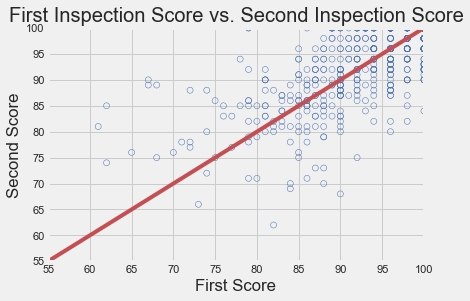

In [129]:
#Creating a scatter plot to observe the distribution of first and second score

wha1, wha2 = zip(*scores_pairs_by_business['score']) 
plt.scatter(wha1, wha2, facecolors='none', edgecolors='b')
plt.xlim(55, 100)
plt.ylim(55, 100)
plt.plot([55, 100], [55, 100], 'r')
plt.title('First Inspection Score vs. Second Inspection Score')
plt.xlabel('First Score')
plt.ylabel('Second Score')

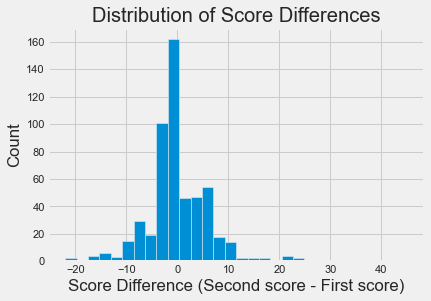

In [133]:
#Creating a histogram to examine the difference in scores

First_Score=np.array(wha1)
Second_Score=np.array(wha2)
Subtract_first_from_second=Second_Score - First_Score
plt.hist(Subtract_first_from_second,bins=30)
plt.xlabel('Score Difference (Second score - First score)')
plt.ylabel('Count')
plt.title('Distribution of Score Differences')
plt.show()

<AxesSubplot:xlabel='year', ylabel='score'>

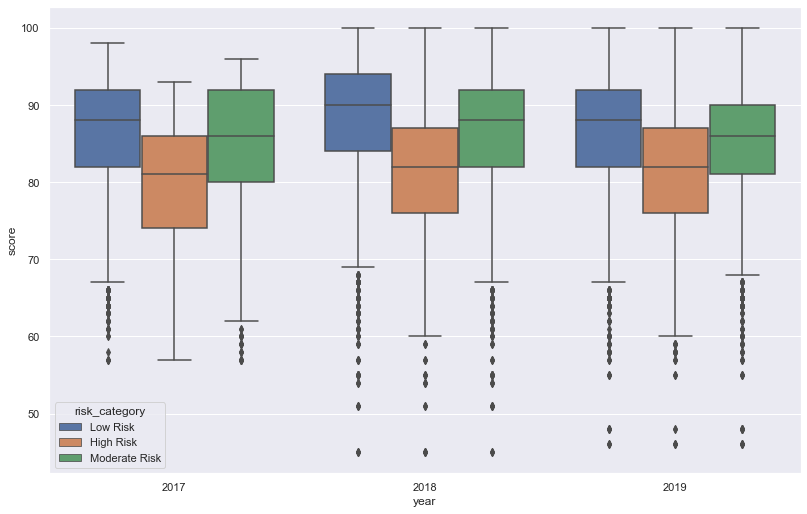

In [134]:
#Creating a boxplot to look at the distribution of restaurant scores over time


sns.set()

new_ins = ins[ins['score']>0]
new_ins = new_ins[(new_ins['year']>=2017) & (new_ins['year']<2020)]
big_guy = ins2vio.merge(vio, on='vid')
real_big = new_ins.merge(big_guy, on='iid')
plt.figure(figsize=(12,8))

sns.boxplot(y='score', x='year', hue='risk_category', data=real_big)

In [155]:
#To create a geospatial plot, a DataFrame rated_geo is required that contains longitude, latitude, and score for 
#each restaurant 


real_bus_lat = bus[(bus['latitude']<40)&(bus['latitude']>0)]
real_bus = real_bus_lat[(bus['longitude']>-130)&(bus['longitude']<-110)]
dude_new = real_bus.merge(ins, on='bid').merge(ins2vio, on='iid').merge(vio, on='vid')
dude_new
dude_new_real = dude_new[['latitude', 'longitude', 'score']]
rated_geo = dude_new_real[dude_new_real['score']>0]
rated_geo

C:\Users\nazia\AppData\Local\Temp/ipykernel_20224/1551819385.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  real_bus = real_bus_lat[(bus['longitude']>-130)&(bus['longitude']<-110)]


,latitude,longitude,score
0,37.755282,-122.420493,74
1,37.752158,-122.420362,85
2,37.752158,-122.420362,90
3,37.749128,-122.417402,92
4,37.748855,-122.418134,78
...,...,...,...
21649,37.777282,-122.419751,92
21651,37.779153,-122.395569,80
21652,37.793907,-122.405863,80
21653,37.801173,-122.425467,85


C:\Users\nazia\AppData\Local\Temp/ipykernel_20224/1799192556.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


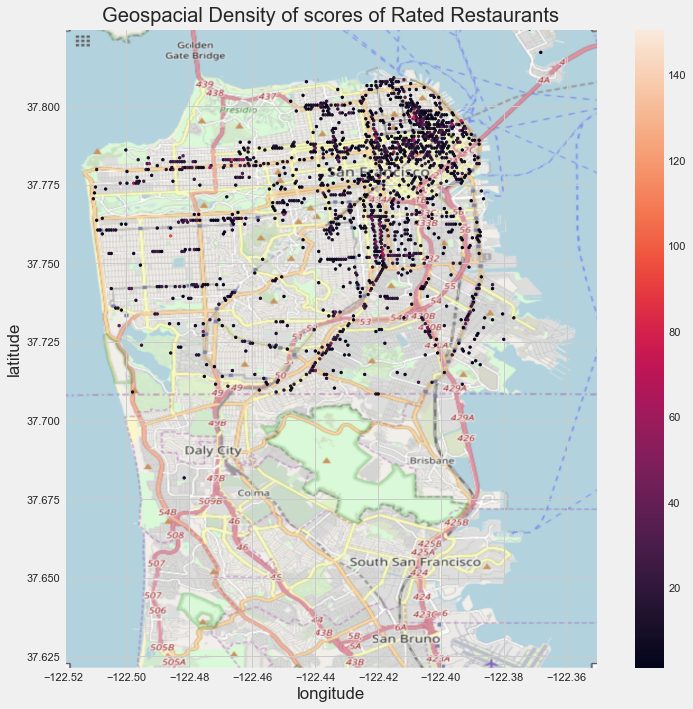

In [157]:
#Creating geospatial hexbin plot for the density of inspection scores for restaurants in San Francisco

min_lon = rated_geo['longitude'].min()
max_lon = rated_geo['longitude'].max()
min_lat = rated_geo['latitude'].min()
max_lat = rated_geo['latitude'].max()
max_score = rated_geo['score'].max()
min_score = rated_geo['score'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((-122.5200, -122.3500, 37.6209, 37.8249))


# Reading in the base map and setting up subplot

basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

plt.hexbin(x=rated_geo['longitude'],y=rated_geo['latitude'],C=rated_geo['score'], gridsize=200,reduce_C_function=np.size)
plt.colorbar()
plt.title('Geospacial Density of scores of Rated Restaurants')
plt.xlabel('longitude')
plt.ylabel('latitude')



# Setting aspect ratio and plotting the hexbins on top of the base map layer

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');



C:\Users\nazia\AppData\Local\Temp/ipykernel_20224/966981508.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


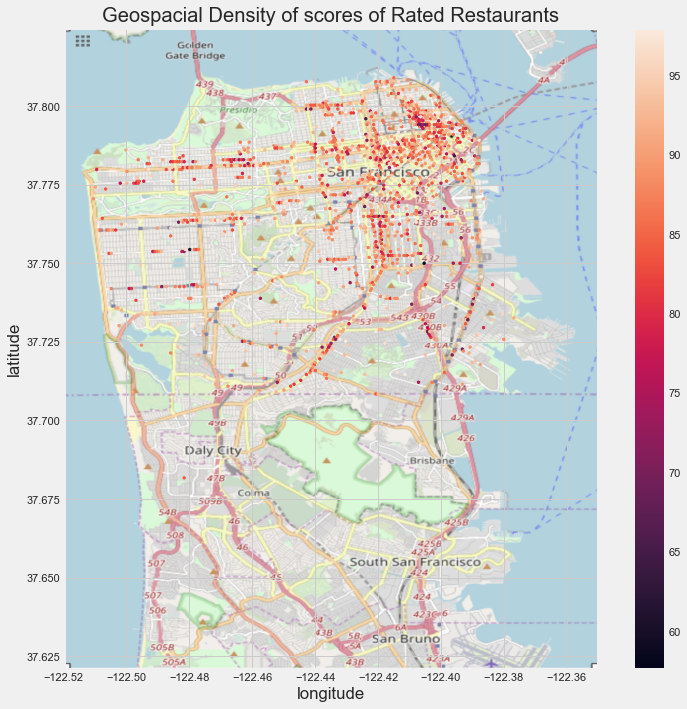

In [158]:
# Read in the base map and setting up subplot

basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])


# Create the hexbin plot
plt.hexbin(x=rated_geo['longitude'],y=rated_geo['latitude'],C=rated_geo['score'], gridsize=200,reduce_C_function=np.mean)
plt.colorbar()
plt.title('Geospacial Density of scores of Rated Restaurants')
plt.xlabel('longitude')
plt.ylabel('latitude')


# Setting aspect ratio and plotting the hexbins on top of the base map layer

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');


In [ ]:
#Findings

#By joining the business and inspection data, the name of the restaurant with the worst rating and optionally 
#the names of the restaurants with the best rating were identified.
#Inspections seems to be more frequent in the downtown area of San Francisco. 
#Some restaurants are inspected more than once a year.
#Overall,inspection scores increased for a lot of restaurants that initially had lower scores. 